# <center>USED BIKE PRICE PREDICTION

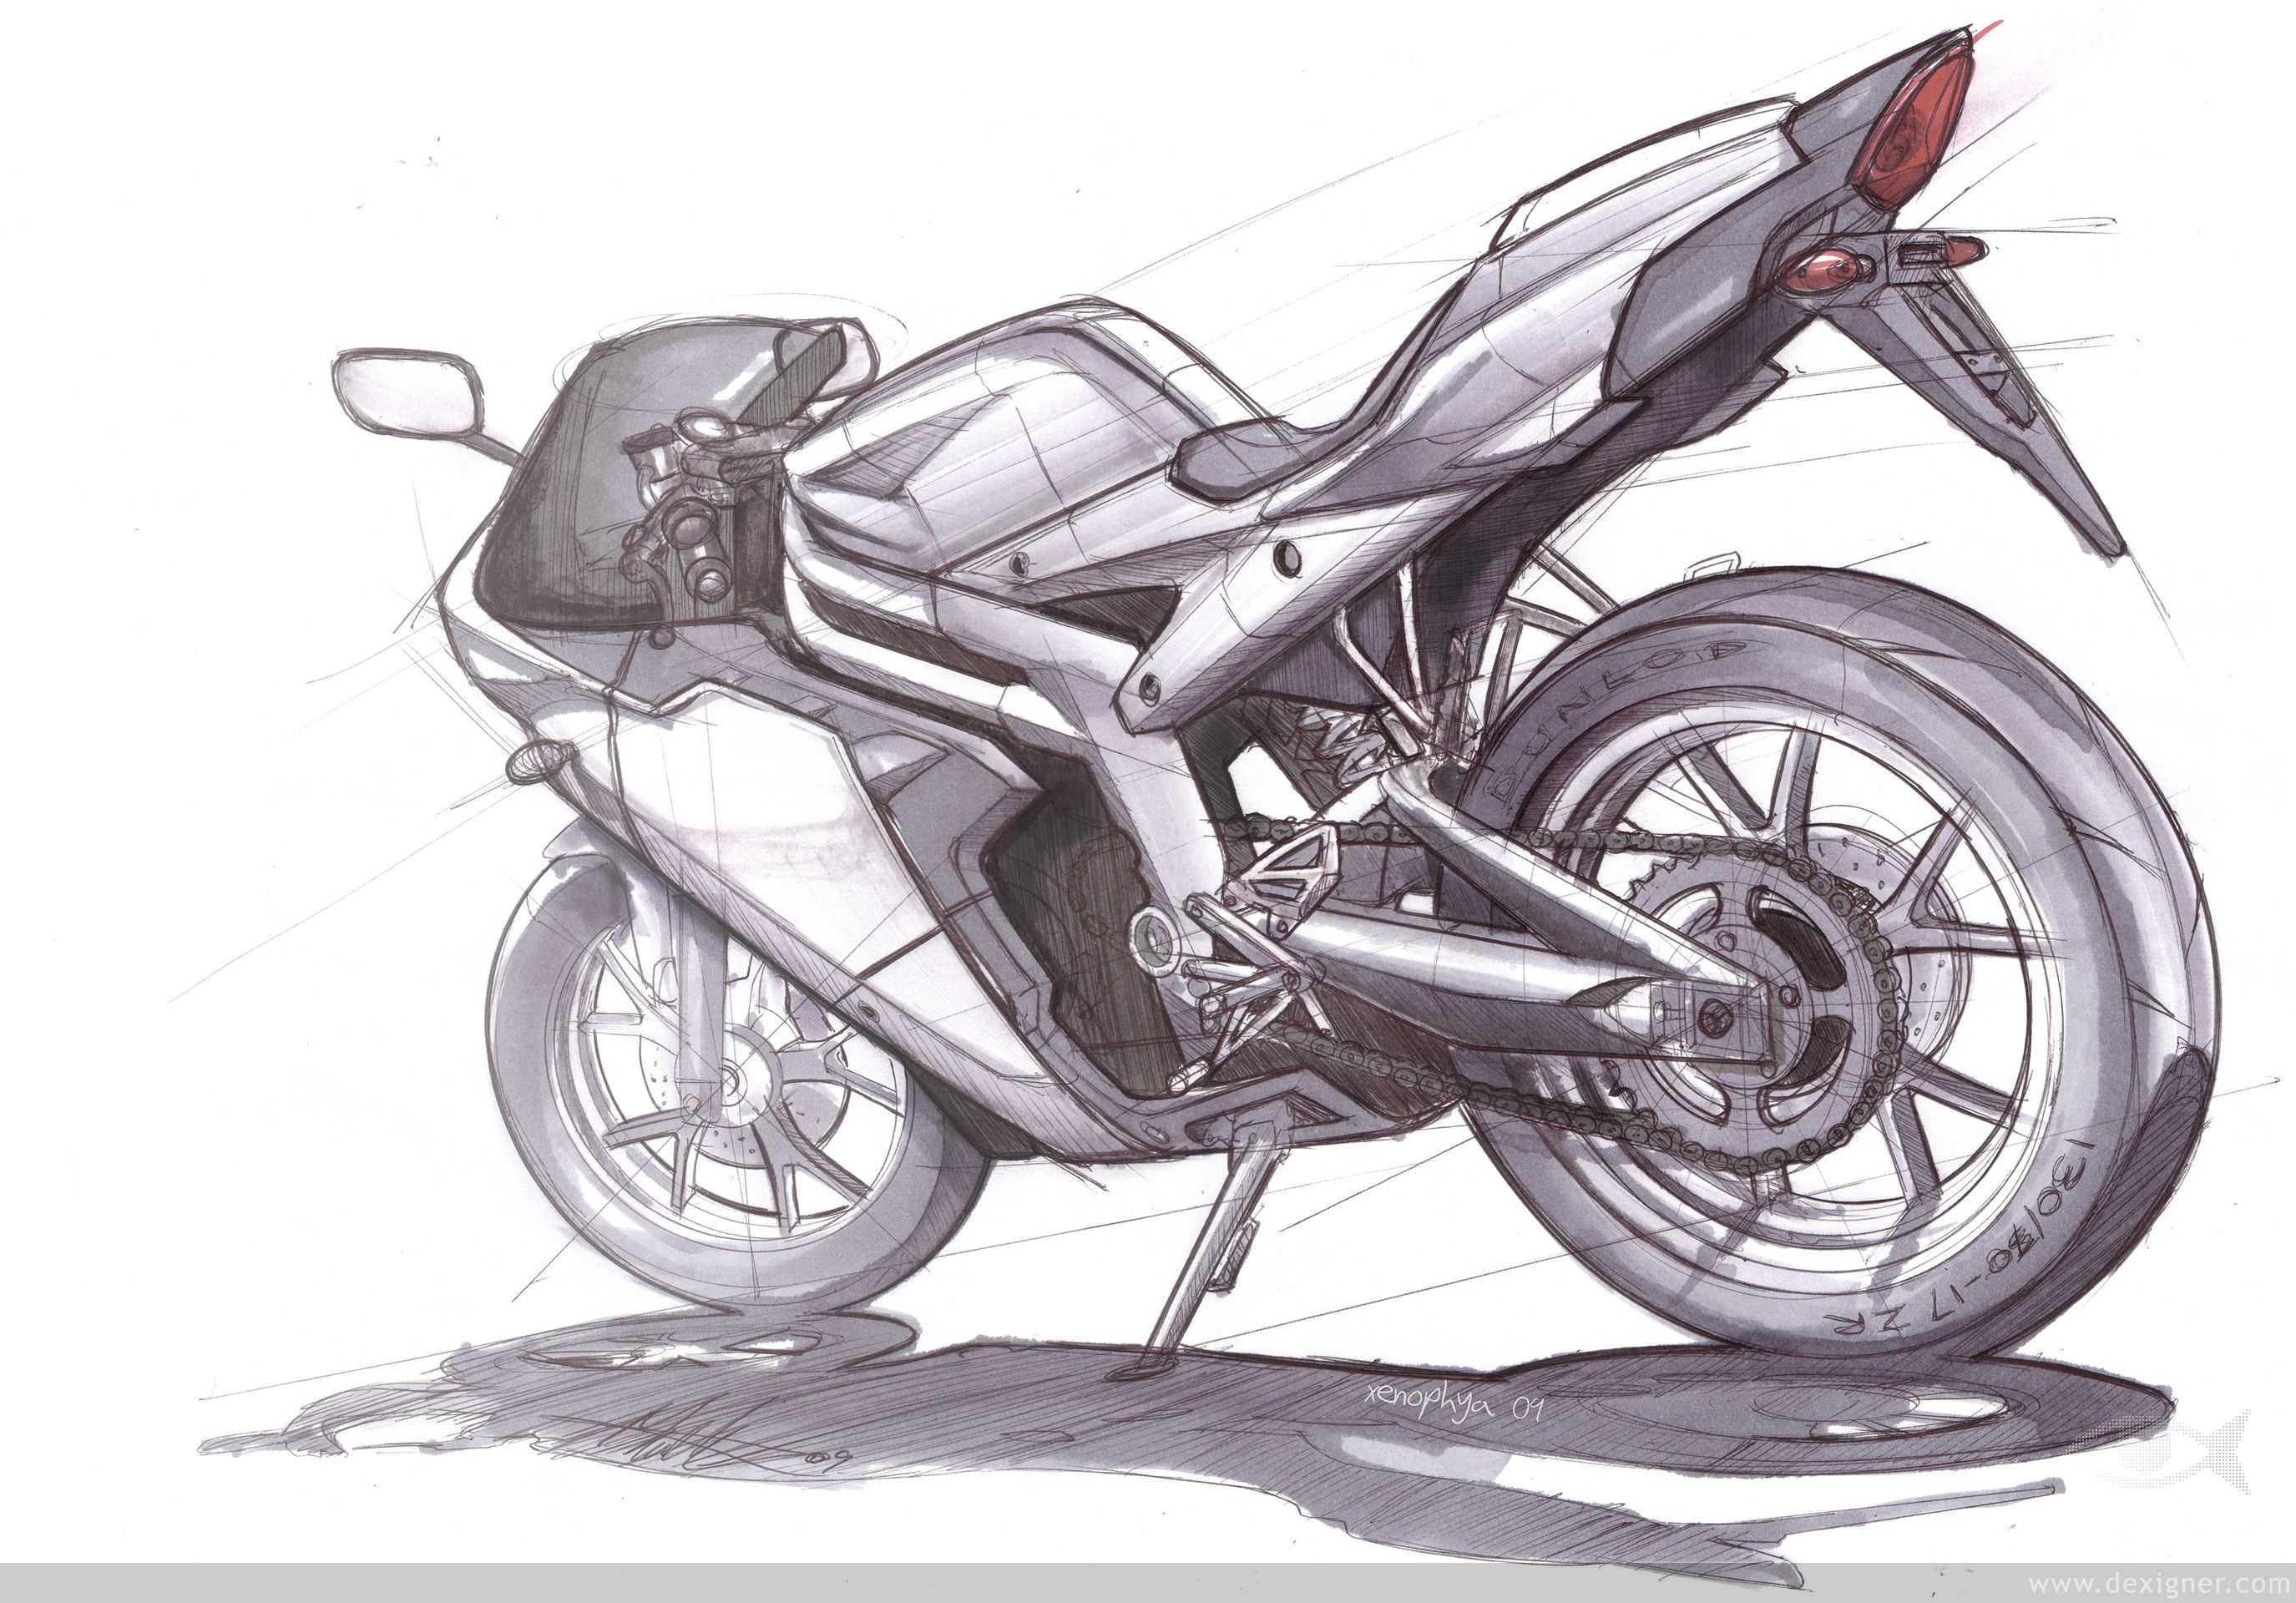

## About Dataset
This dataset contains around 32K records of used bike prices in India. The data has been collected from one of the leading online portal to sell used bikes in India via web scrapping.

## Dataset Information
BIKE_name:
The name of the bike's model. It contains some additional information like model year,engine etc.

kms_driven:
Total kilometers the bike has been driven.

owner:
The represents which type of owner the bike has like it is first owner which means the current owner had bought the this bike as new, second owner means the bike has been sold to this owner from first owner and so on.

city:
The location of the seller.

mileage:
Average mileage the bike gives. Its is represented as kilometer per liter of petrol (kmpl).

power:
Power is in terms of Bhp. BHP is the rate at which the torque generated by the engine in a bike is delivered to the wheels. Such that faster the deliverability, higher is the speed of the motorcycle and vice versa. For a bike that consists of a lower BHP can pull higher loads and for a bike that contains a greater BHP can propel the bike at faster speeds.
Thus, BHP depends on several factors such as deliverability, weight and power generation of the bike. It’s the most common way
of rating a bike and determining which ones might be faster

Brand:brand name of bikes

price:
This is the target variable of the dataset. t is in Indian rupee

# <CENTER> IMPORTING LIBRARIES

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [77]:
df=pd.read_csv('Used_Bikes.csv.zip')

In [78]:
df

bike_name     price       city  kms_driven  \
0        TVS Star City Plus Dual Tone 110cc   35000.0  Ahmedabad     17654.0   
1               Royal Enfield Classic 350cc  119900.0      Delhi     11000.0   
2                      Triumph Daytona 675R  600000.0      Delhi       110.0   
3                      TVS Apache RTR 180cc   65000.0  Bangalore     16329.0   
4      Yamaha FZ S V 2.0 150cc-Ltd. Edition   80000.0  Bangalore     10000.0   
...                                     ...       ...        ...         ...   
32643                Hero Passion Pro 100cc   39000.0      Delhi     22000.0   
32644                  TVS Apache RTR 180cc   30000.0     Karnal      6639.0   
32645              Bajaj Avenger Street 220   60000.0      Delhi     20373.0   
32646             Hero Super Splendor 125cc   15600.0     Jaipur     84186.0   
32647                    Bajaj Pulsar 150cc   22000.0       Pune     60857.0   

             owner   age  power          brand  
0      First Owner   3.0  110.0            TVS  
1      First Owner   4.0  350.0  Royal Enfield  
2      First Owner   8.0  675.0        Triumph  
3      First Owner   4.0  180.0            TVS  
4      First Owner   3.0  150.0         Yamaha  
...            ...   ...    ...            ...  
32643  First Owner   4.0  100.0           Hero  
32644  First Owner   9.0  180.0            TVS  
32645  First Owner   6.0  220.0          Bajaj  
32646  First Owner  16.0  125.0           Hero  
32647  First Owner  13.0  150.0          Bajaj  

[32648 rows x 8 columns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [80]:
df.shape

(32648, 8)

In [81]:
df.describe()

price     kms_driven           age         power
count  3.264800e+04   32648.000000  32648.000000  32648.000000
mean   6.829542e+04   26344.625184      8.048211    213.511302
std    9.071860e+04   22208.527695      4.031700    134.428868
min    4.400000e+03       1.000000      1.000000    100.000000
25%    2.500000e+04   12000.000000      5.000000    150.000000
50%    4.300000e+04   20373.000000      7.000000    150.000000
75%    8.000000e+04   35000.000000     10.000000    220.000000
max    1.900000e+06  750000.000000     63.000000   1800.000000

In [82]:
df.isnull().mean()*100

bike_name     0.0
price         0.0
city          0.0
kms_driven    0.0
owner         0.0
age           0.0
power         0.0
brand         0.0
dtype: float64

In [83]:
df.duplicated().sum()

25324

In [84]:
df.drop_duplicates(inplace=True)

# UNIVARIATE ANALYSIS

# HISTPLOT

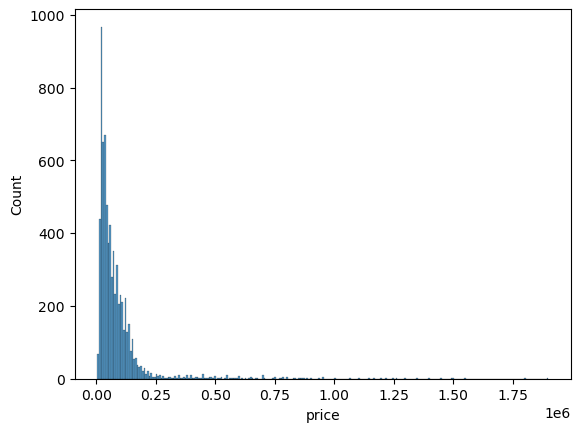

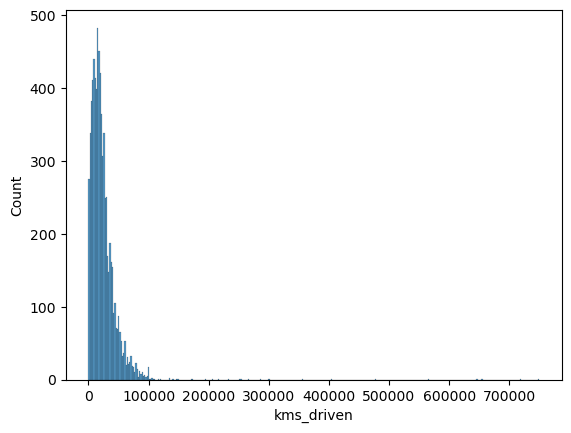

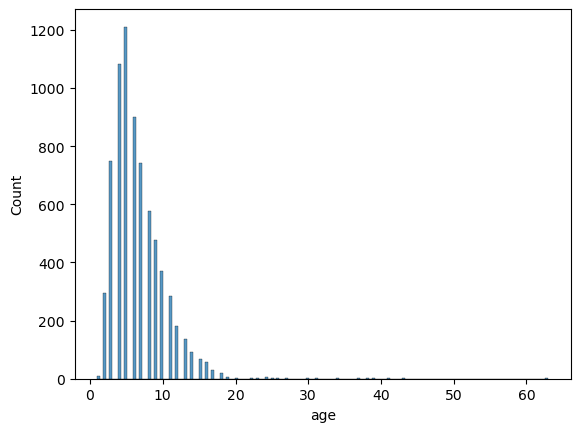

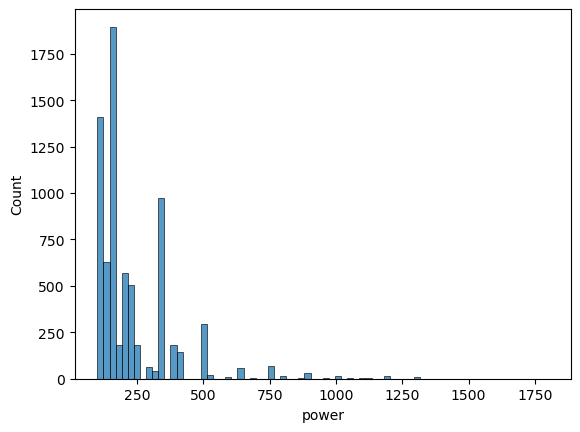

In [85]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

# KDE PLOT

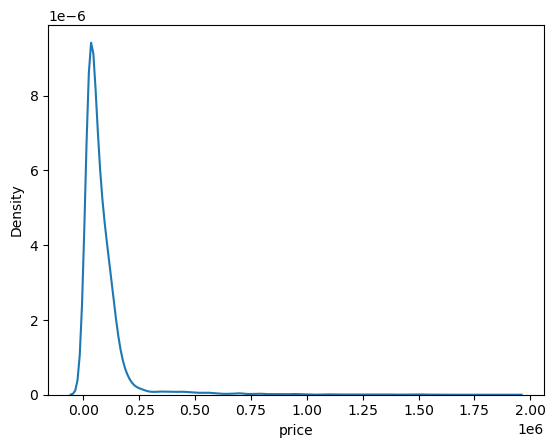

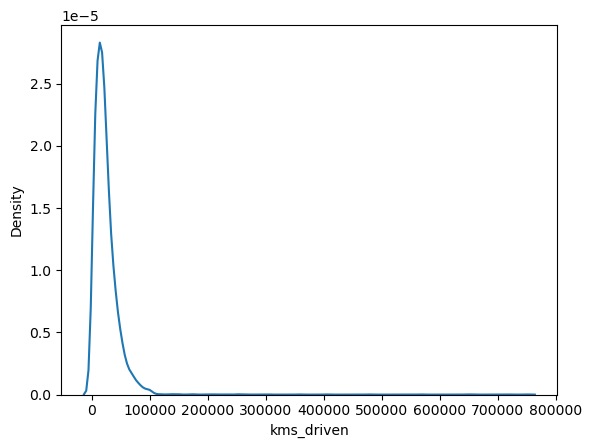

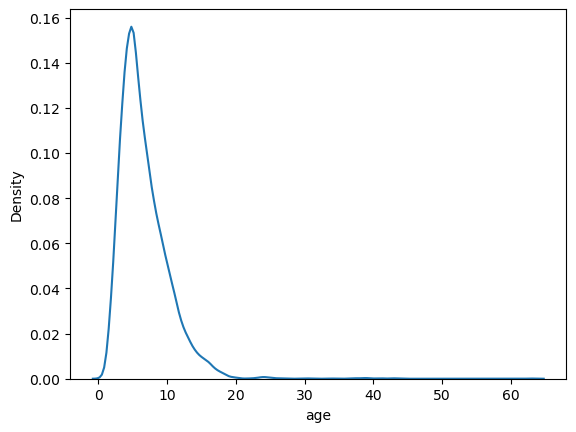

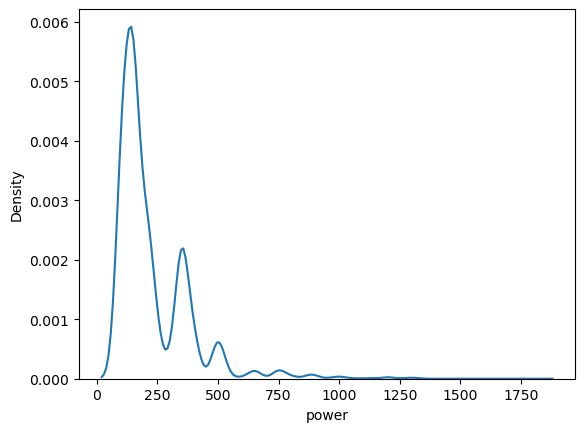

In [86]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

# BOXPLOT

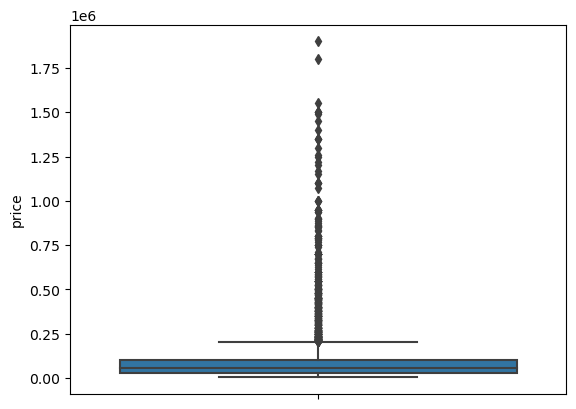

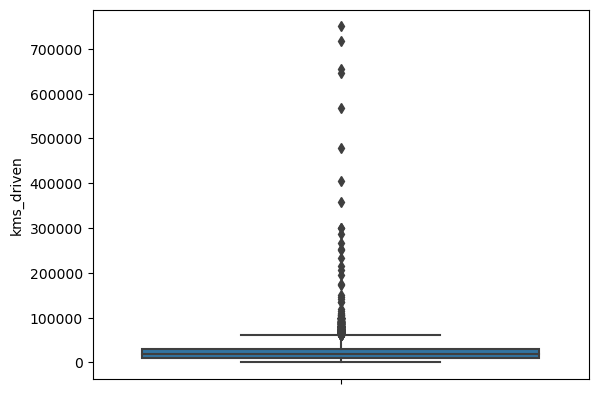

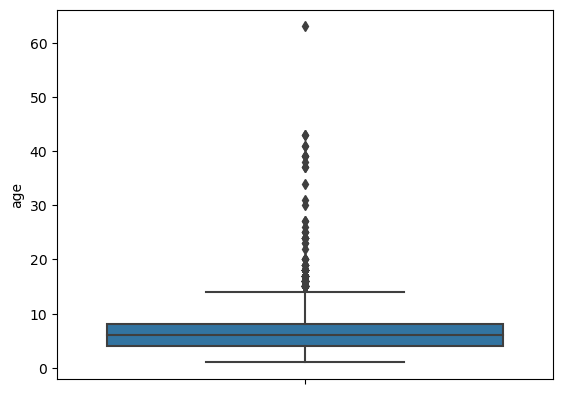

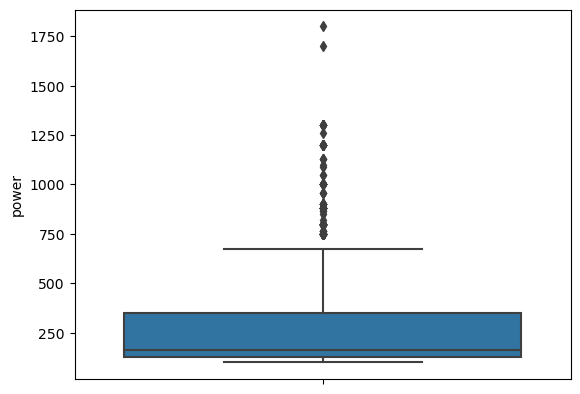

In [87]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

# MULTIVARIATE ANALYSIS

# BARPLOT

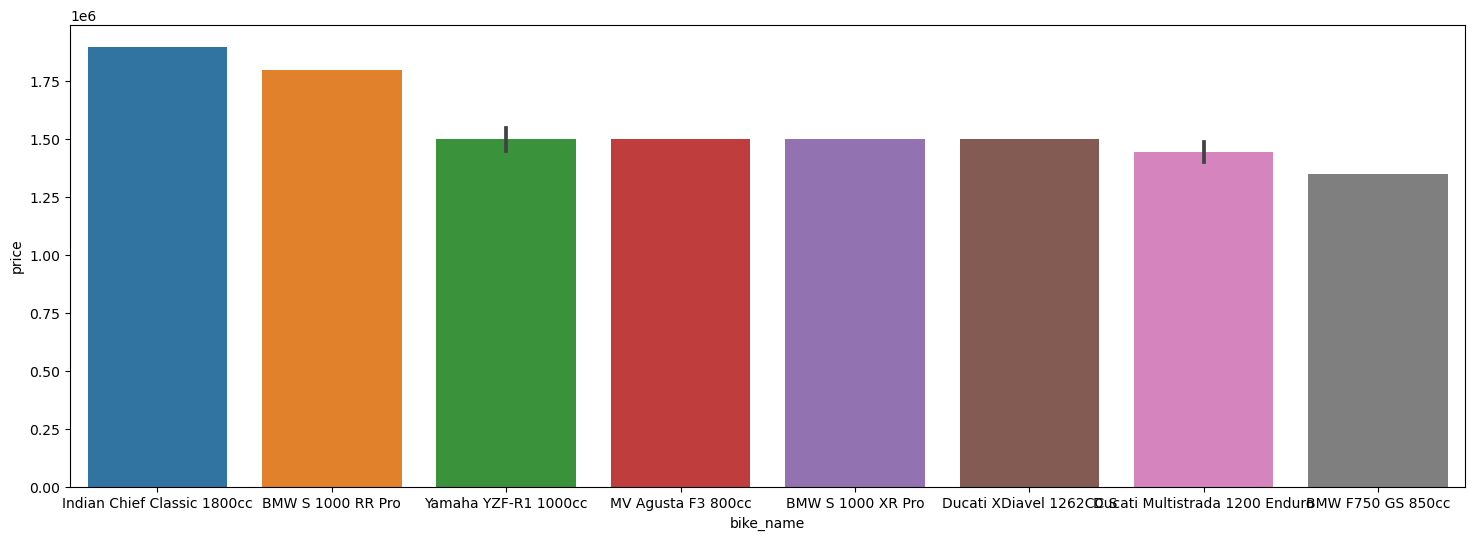

In [88]:
plt.figure(figsize=(18, 6))
sns.barplot(x='bike_name', y="price", data=df.sort_values(by='price', ascending=False)[:10]);

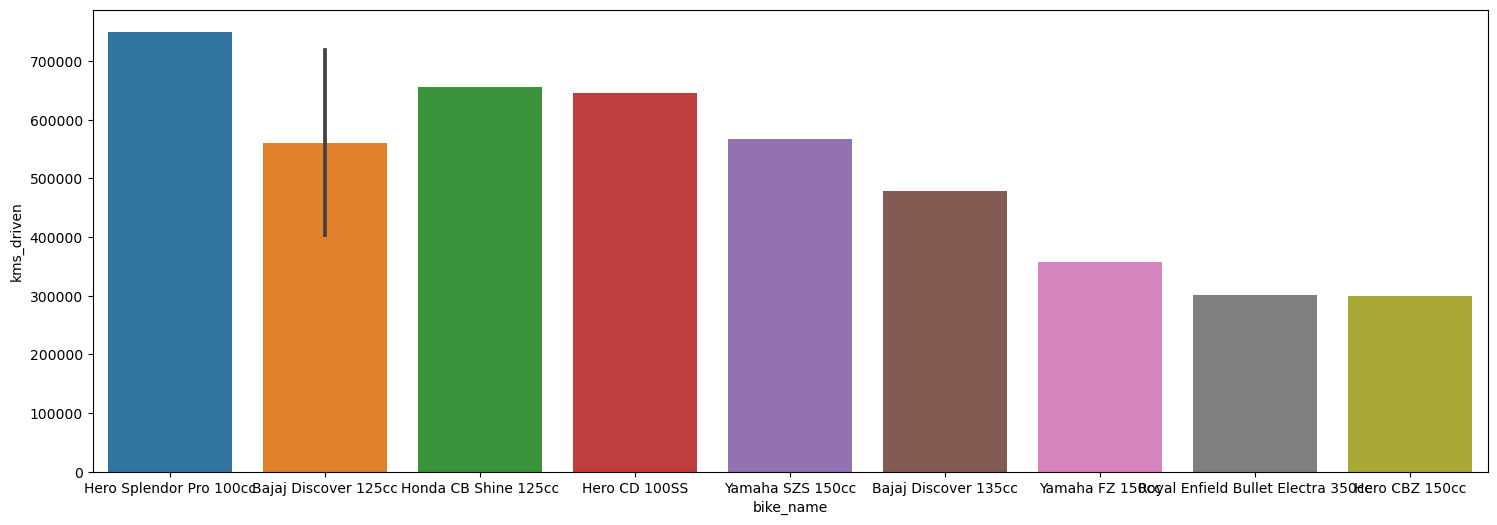

In [89]:
plt.figure(figsize=(18, 6))
sns.barplot(x='bike_name', y="kms_driven", data=df.sort_values(by='kms_driven', ascending=False)[:10]);

# LINECHART

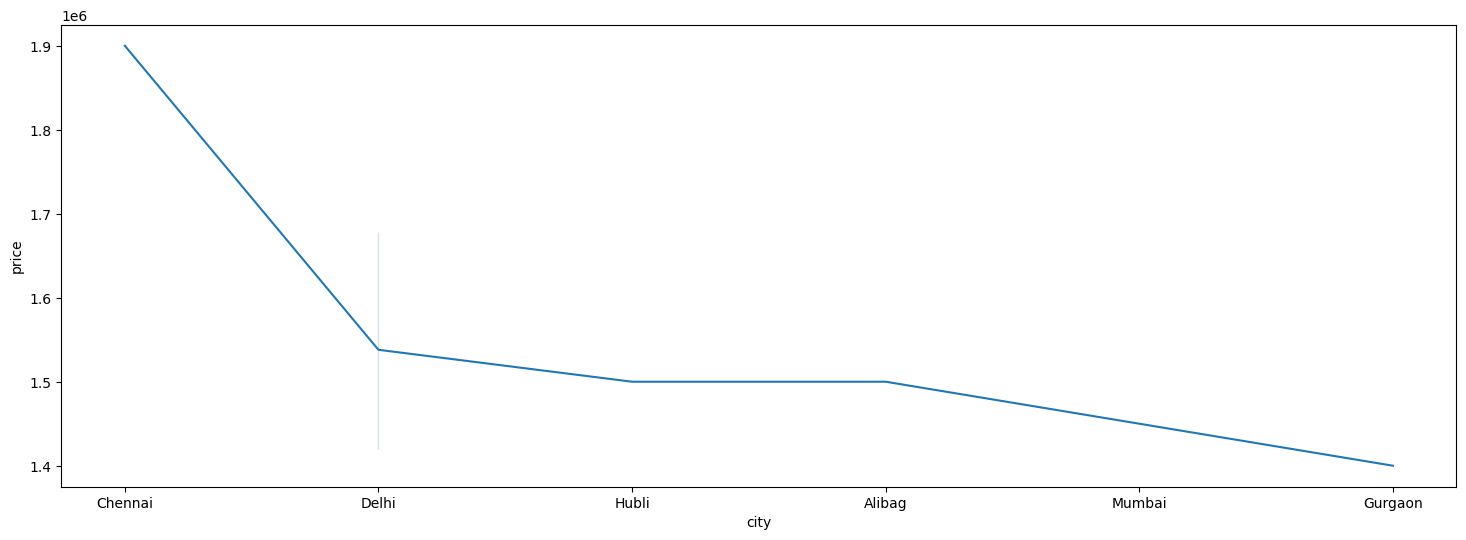

In [94]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='city', y="price", data=df.sort_values(by='price', ascending=False)[:10]);

# SUBPLOT

price            AxesSubplot(0.125,0.11;0.168478x0.77)
kms_driven    AxesSubplot(0.327174,0.11;0.168478x0.77)
age           AxesSubplot(0.529348,0.11;0.168478x0.77)
power         AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

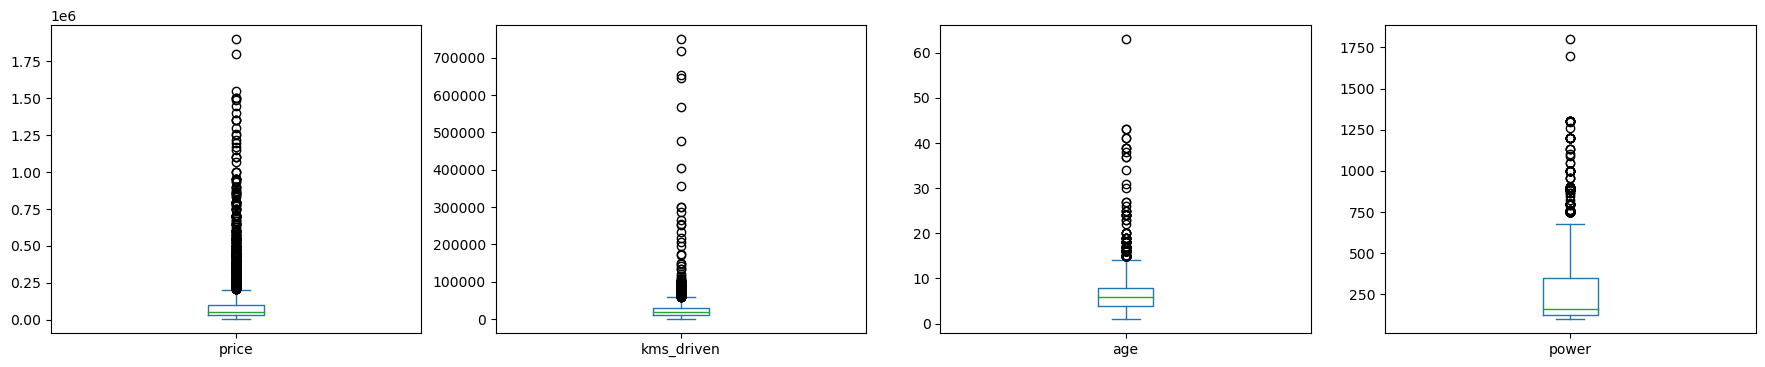

In [92]:
df.plot.box(figsize=(22,4),subplots=True)

# PAIRPLOT

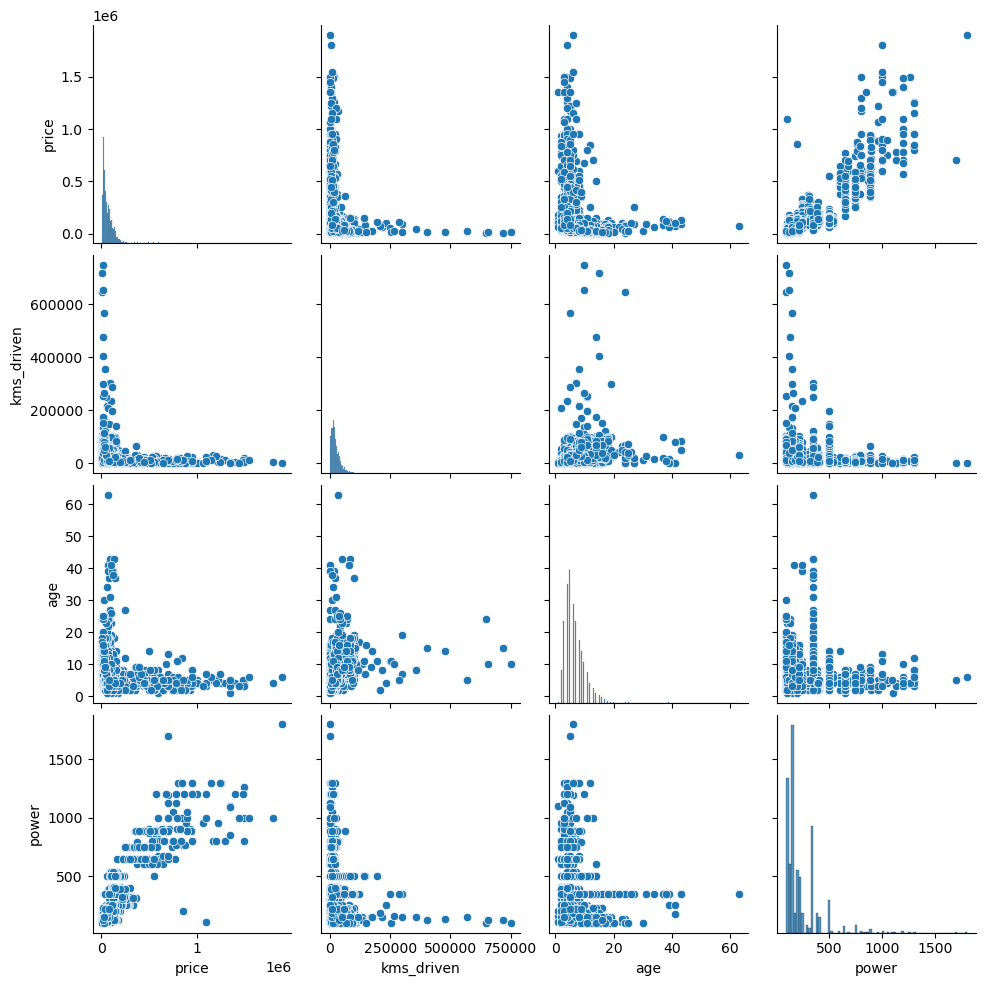

In [93]:
sns.pairplot(data=df)
plt.show()

# OUTLIER TRAETMENT

In [52]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [53]:
for column in df.columns:
    if df[column].dtype!='object':
       UL,LL=outlier_limit(df[column])
       df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

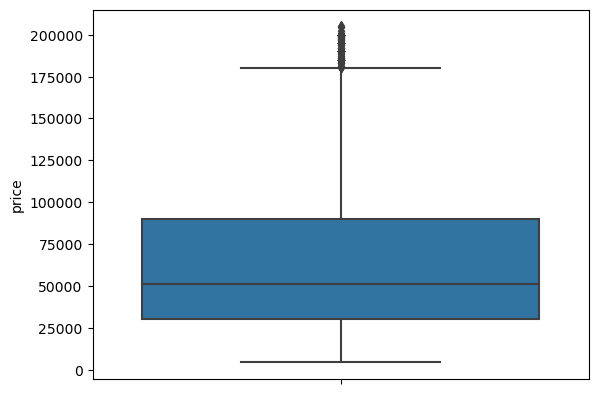

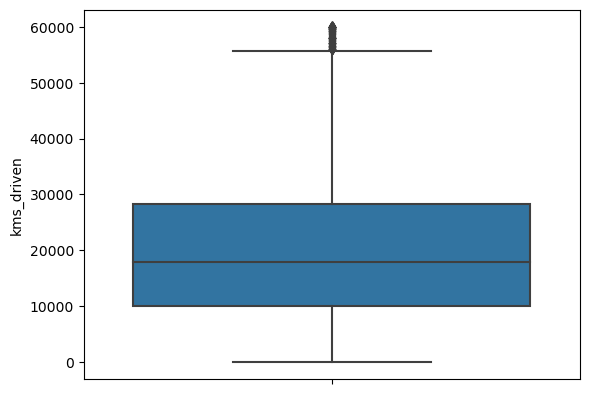

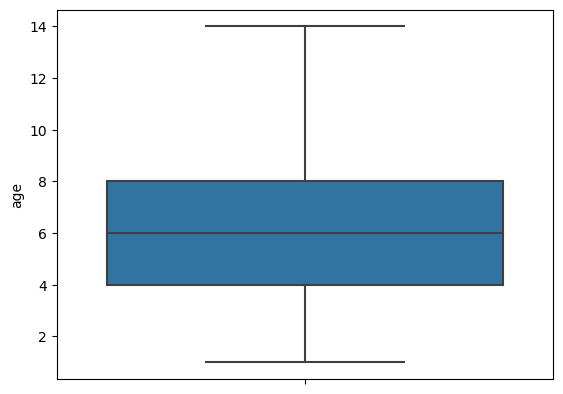

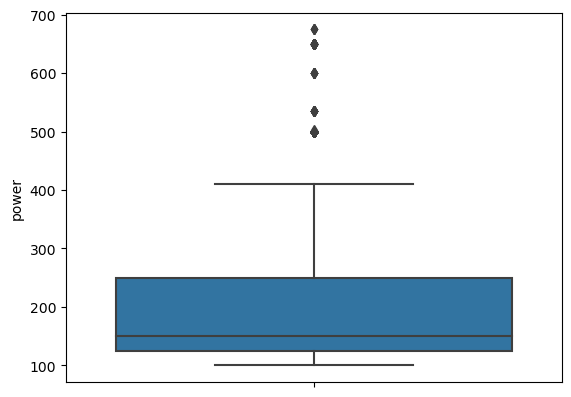

In [54]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

In [55]:
df.isnull().mean()*100

bike_name     0.000000
price         4.765156
city          0.000000
kms_driven    4.642272
owner         0.000000
age           2.949208
power         2.307482
brand         0.000000
dtype: float64

In [56]:
df.dropna(inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6482 entries, 0 to 9372
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   6482 non-null   object 
 1   price       6482 non-null   float64
 2   city        6482 non-null   object 
 3   kms_driven  6482 non-null   float64
 4   owner       6482 non-null   object 
 5   age         6482 non-null   float64
 6   power       6482 non-null   float64
 7   brand       6482 non-null   object 
dtypes: float64(4), object(4)
memory usage: 455.8+ KB


# USING LABEL ENCODING

In [58]:
cols=['bike_name','city','brand']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)

In [59]:
df

bike_name     price  city  kms_driven        owner  age  power  brand
0           319   35000.0     6     17654.0  First Owner  3.0  110.0     11
1           224  119900.0   109     11000.0  First Owner  4.0  350.0      9
3           295   65000.0    42     16329.0  First Owner  4.0  180.0     11
4           329   80000.0    42     10000.0  First Owner  3.0  150.0     12
5           340   53499.0   109     25000.0  First Owner  6.0  150.0     12
...         ...       ...   ...         ...          ...  ...    ...    ...
9361          3   50000.0    42     29134.0  First Owner  7.0  220.0      0
9362        101   25000.0   109     48587.0  First Owner  8.0  150.0      2
9369          3   35000.0    42     60000.0  First Owner  9.0  220.0      0
9371         36  139000.0   173     21300.0  First Owner  4.0  400.0      0
9372          9   80000.0   173      7127.0  First Owner  5.0  220.0      0

[6482 rows x 8 columns]

# CHECKING CORRELATION USING HEAT MAP

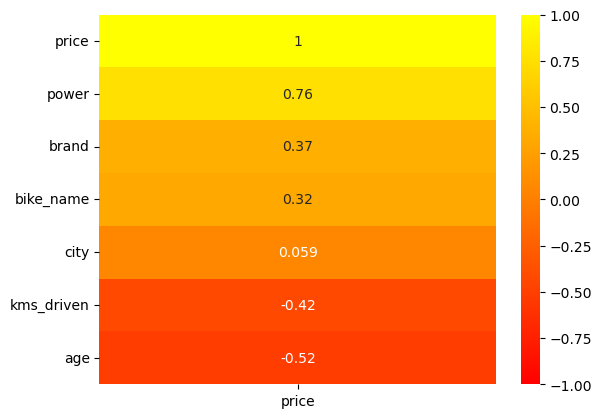

In [60]:
sns.heatmap(df.corr()[['price']].sort_values(by="price",
                                                ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

# SELECTING X AND Y

In [62]:
x=df[['power','brand','bike_name']].values

In [63]:
y=df[['price']].values

# FEATURE SCALING

In [64]:
sc=StandardScaler()

In [65]:
x=sc.fit_transform(x)

# CROSS VALIDATION

In [66]:
models={
    'LinearRegression':LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [67]:
for name,model in models.items():
    scores=cross_val_score(model, x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average =np.mean(rmse)
    print("AVERAGE RMSE:",rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 27322.93713801941
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 27322.855300953564
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 74500.62694739799
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 16444.892006647136
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 18341.43738625554
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 23454.607415130682
***************************************************************

# MODEL BUILDING USING RANDOMFORESTREGRESSOR

In [69]:
model=RandomForestRegressor()

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [71]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
y_pred=model.predict(x)

# PREDICT Y

In [73]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

ACTUAL      PREDICTED
0   35000.0   41559.248603
1  119900.0  110948.100542
2   65000.0   52001.067714
3   80000.0   72392.113276
4   53499.0   39297.040652

### SCATTERPLOT

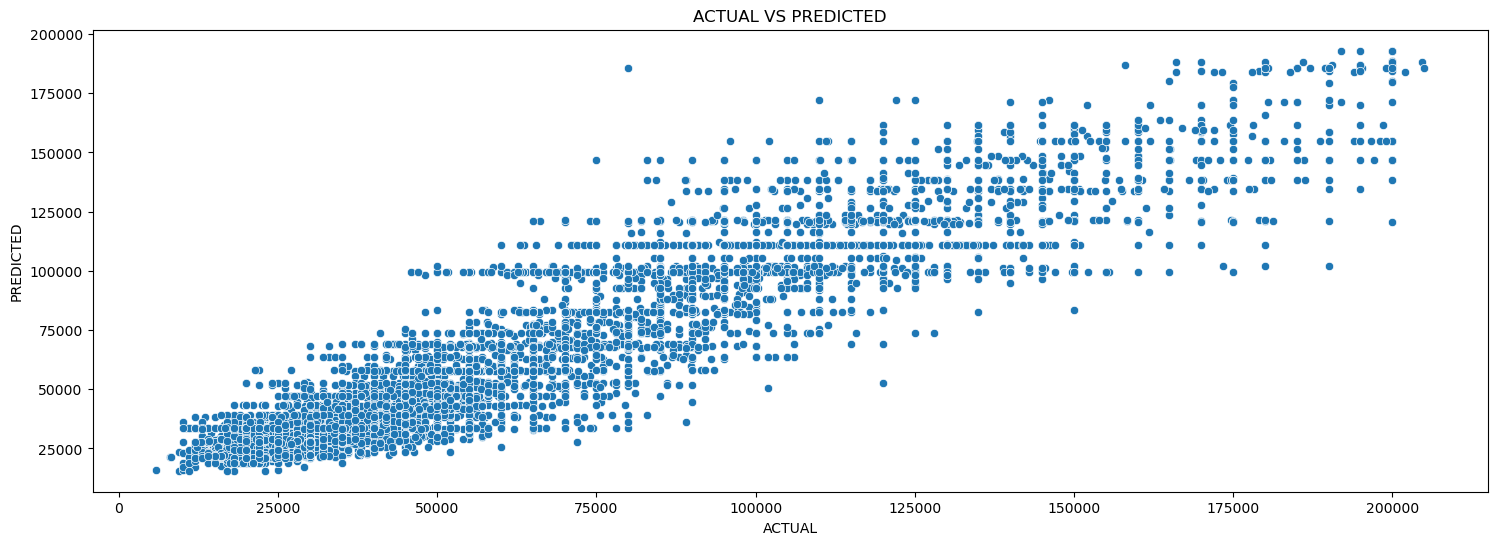

In [74]:
plt.figure(figsize=(18,6))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");